In [130]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 


# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from collections import deque

In [131]:
import os 
print(os.getcwd())

d:\source\PesquisaMestradoFinal\dataSetResume


Foram geradas as ações abaixo  
acao 0 = ["0.1,0.1,0.1,1,1","1,1,1,0.1,0.1","0.5,0.5,0.5,0.1,0.1","0.1,0.1,0.1,0.5,0.5","1,1,1,1,1"] 
Com as ações acima, foram criado cenários com 68 interação no ambiente
Ambiente é uma topologia de rede neural para resoluções de questões do tipo  multitarefas da base Clevr sem imagem  
Cada epsódio foi executado 3x e sua média computada 
Para cada média dos epsodios foram gerados :
     Grafico   
     DataBase para execução DQN 



In [132]:
#Carrega a media dos epsodios 
def LoadEp( acao ): 
    
    arquivo = pd.read_csv(acao)
    return arquivo
    

In [133]:
#Gera Database Para treinamento DQN 

def generateDataBaseEpsodi ( epsodio,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory):
  state = [0,0,0,0,0]
  acumulativeReward = 0
  done = False
  
  for interaction in range(episodes*intFactor): 
   
    action = epsodio["acao"][interaction]  
    stateNew = ast.literal_eval(epsodio["concat"][interaction])*power     
    if TypeReward == "MAX" :
      reward = multi*np.max(stateNew )
      if interaction <= DoneInteractions-1:
        acumulativeReward += reward
    elif TypeReward == "MIN" :
      reward = multi*np.min(stateNew )
      if interaction <= DoneInteractions-1:
        acumulativeReward += reward
    elif TypeReward == "MAX_LAST" :
      reward = multi*np.max(stateNew )
      if interaction == DoneInteractions-1:
        acumulativeReward = reward
    elif TypeReward == "MIN_LAST" :
      reward = multi*np.min(stateNew)
      if interaction == DoneInteractions-1:
        acumulativeReward = reward
    else: 
      print('ERRO ERRO ERRO ERRO ERRO')
    if interaction >= DoneInteractions*intFactor -1  :
      done = True
    memory.append([state,action,reward,stateNew,done])
    state = stateNew
    print(" ************  Random: Episode {}, Reward {}".format(
                interaction, acumulativeReward))


In [138]:


# Problem
DoneInteractions = 28


# Database
episodes = 1
intFactor = 1
buffer_size = episodes*DoneInteractions*intFactor

TypeReward = "MIN"
multi = 1
power = 1

memory = deque(maxlen=buffer_size)

ep_acao1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao0.csv')
ep_acao1.head
ep_acao2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao1.csv')
ep_acao3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao2.csv')
ep_acao4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao3.csv')
ep_acao5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao4.csv')



memory = generateDataBaseEpsodi ( ep_acao1,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory)


 ************  Random: Episode 0, Reward 0.05522


In [135]:
def gerarRelatorio( arquivo,title):
  graf =  np.zeros((5,len(arquivo)))
      
  for i in range(5):
    for interaction in range(len(arquivo)): 
      graf[i,interaction] = ast.literal_eval(arquivo["concat"][interaction])[i]

  fig, ax = plt.subplots()
  for i in range(5):
     ax.plot(graf[i],label="Questao {}".format(i))
     
  ax.set_title(title)
  
  plt.legend(loc="lower right")
  fig.autofmt_xdate()
 

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)


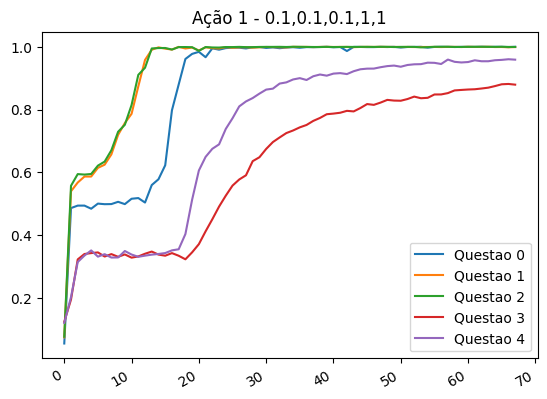

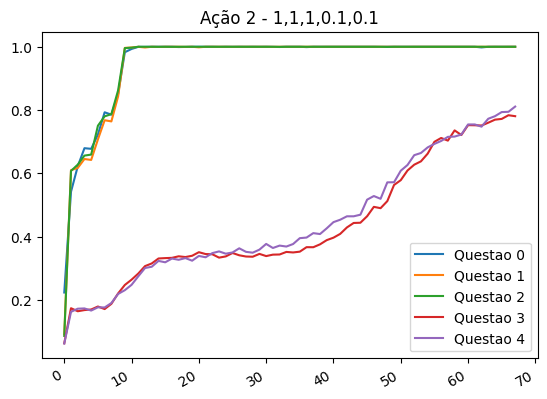

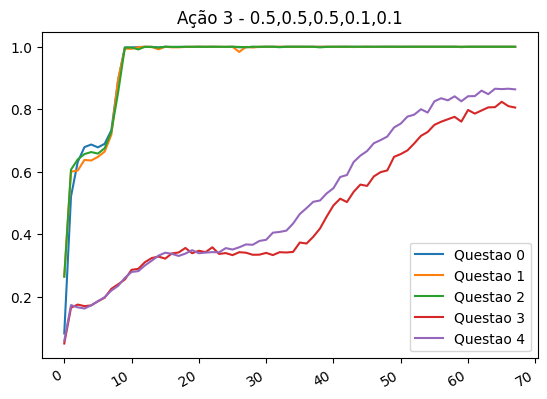

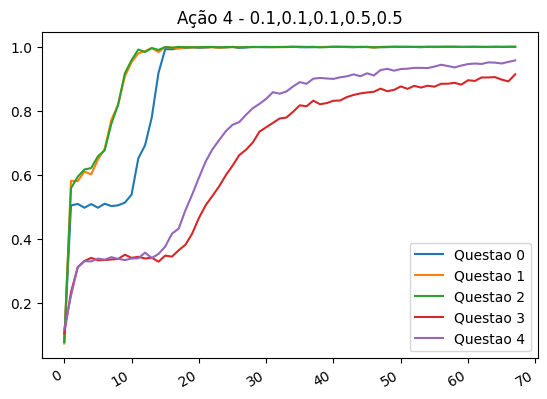

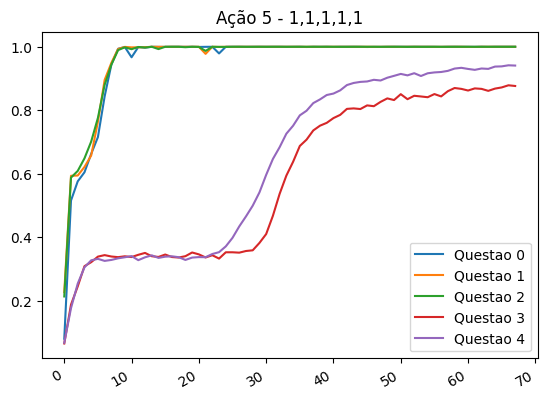

In [137]:

Title = 'Ação 1 - 0.1,0.1,0.1,1,1'
gerarRelatorio(ep_acao1,Title)
Title = 'Ação 2 - 1,1,1,0.1,0.1'
gerarRelatorio(ep_acao2,Title)
Title = 'Ação 3 - 0.5,0.5,0.5,0.1,0.1'
gerarRelatorio(ep_acao3,Title)
Title = 'Ação 4 - 0.1,0.1,0.1,0.5,0.5'
gerarRelatorio(ep_acao4,Title)
Title = 'Ação 5 - 1,1,1,1,1'
gerarRelatorio(ep_acao5,Title)

 

In [139]:
episodio_automatico_1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Automatico_Epsodio_1.csv')

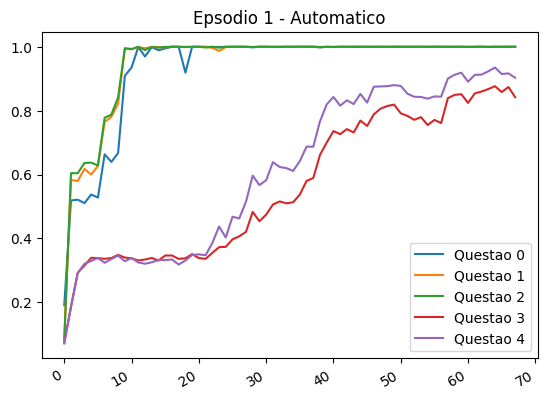

In [141]:
Title = 'Epsodio 1 - Automatico'
gerarRelatorio(episodio_automatico_1,Title)
